# Figure - GPU comparison


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import os
work_dir = "H:/workspace/ptyrad_paper"
os.chdir(work_dir)
print("Current working dir: ", os.getcwd())

Current working dir:  H:\workspace\ptyrad_paper


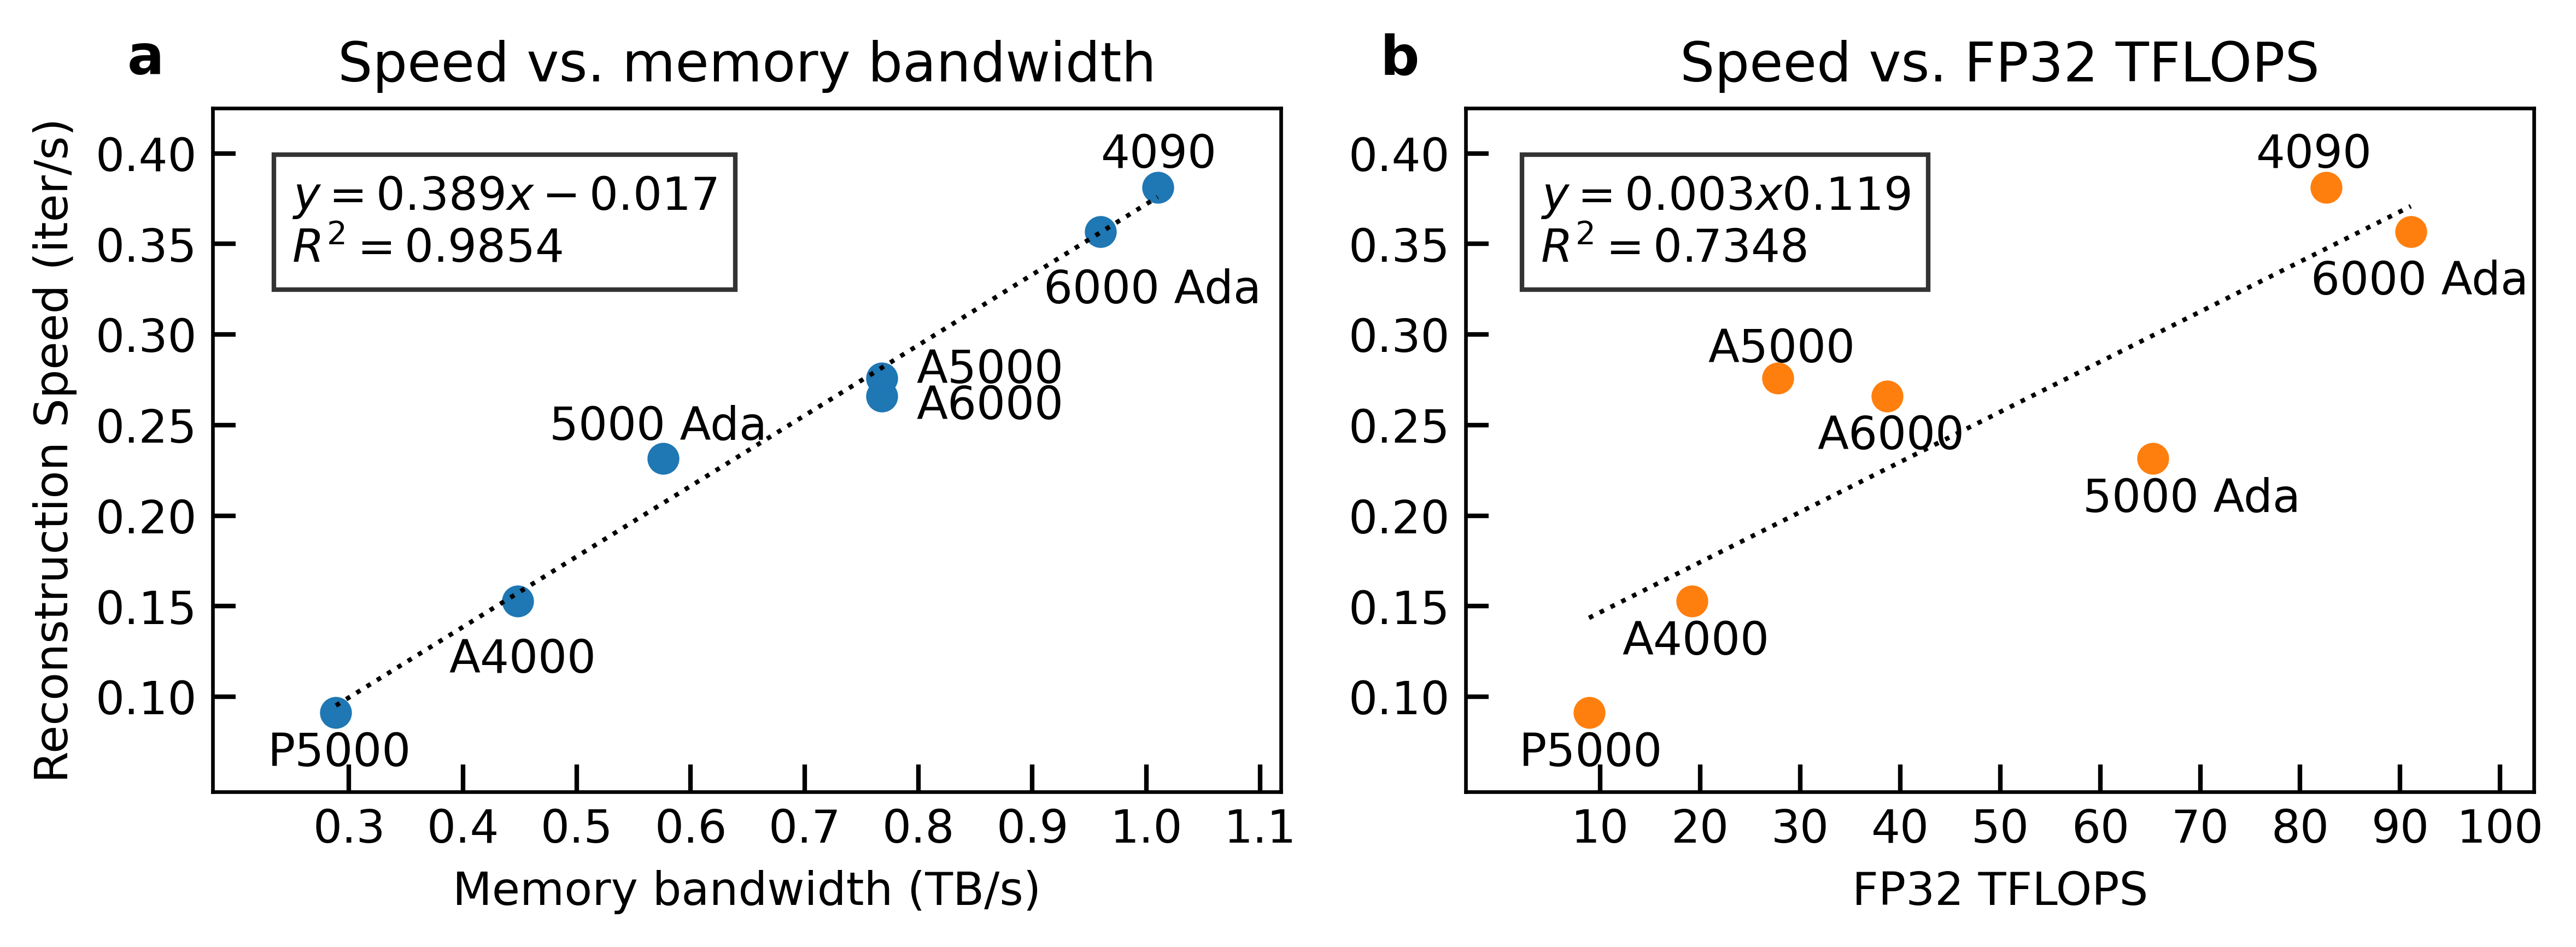

In [2]:
# Set Matplotlib styles
mpl.rc('xtick', direction='in')
mpl.rc('xtick.major', width=1, size=6)
mpl.rc('xtick.minor', width=1, size=3)
mpl.rc('ytick', direction='in')
mpl.rc('ytick.major', width=1, size=5)
mpl.rc('ytick.minor', width=1, size=3)

# Memory bandwidth spec are all coming from https://www.techpowerup.com/
# Access of different GPUs are enabled by vastai https://vast.ai/, although each machine would have different CPUs and memory setup
# The speed test is done with params/paper/ptyrad_GPU_speed_tBL_WSe2.yml (12 probe, 1 slice, batch size = 256)
# See docs/20241219_GPU_comparison/ for raw data and more details

# Data
memory_bandwidth = [0.2885, 0.4480, 0.5760, 0.7680, 0.7680, 0.9600, 1.0100]  # TB/s
fp32_tflops = [8.87, 19.17, 65.28, 27.77, 38.71, 91.06, 82.58] 
speed = [0.0912, 0.1527, 0.2314, 0.2759, 0.2660, 0.3566, 0.3813]  # iter/s
labels = ['P5000', 'A4000', '5000 Ada', 'A5000', 'A6000', '6000 Ada', '4090'] # These are all RTX
label_y_offset = [0.01, 0.02, -0.03, -0.0165, -0.0065, 0.02, -0.03] # Label vertical offsets
label_x_offset = [0.06, 0.06,  0.1, -0.03, -0.03, 0.05, 0.05] # Label horizontal offsets

# Create a 2-panel figure
fig, axs = plt.subplots(1, 2, figsize=(8, 3), dpi=600)

# ---- Left panel: Memory bandwidth vs. Speed ----
ax = axs[0]
slope, intercept = np.polyfit(memory_bandwidth, speed, 1)
fit_line = np.array(memory_bandwidth) * slope + intercept

ax.scatter(memory_bandwidth, speed, color='C0')
ax.plot(memory_bandwidth, fit_line, linestyle="dotted", color="black", linewidth=1)

# Label GPUs
for i, label in enumerate(labels):
    ax.text(memory_bandwidth[i] - label_x_offset[i], speed[i] - label_y_offset[i], label, verticalalignment='top')

# Equation and R-squared value
r_squared = np.corrcoef(memory_bandwidth, speed)[0, 1] ** 2
eq_text = f'$y = {slope:.3f}x {intercept:.3f}$\n$R^2 = {r_squared:.4f}$'
ax.text(0.25, 0.34, eq_text, color='black', bbox=dict(facecolor='white', alpha=0.8))

# Adjust x and y limits with a small margin
x_margin = 0.15 * (max(memory_bandwidth) - min(memory_bandwidth))
y_margin = 0.15 * (max(speed) - min(speed))

# Axis labels and limits
ax.set_xlabel("Memory bandwidth (TB/s)")
ax.set_ylabel("Reconstruction Speed (iter/s)")
ax.set_xticks(np.linspace(0.3, 1.1, 9))
ax.set_yticks(np.linspace(0.1, 0.4, 7))
ax.set_xlim(min(memory_bandwidth) - x_margin, max(memory_bandwidth) + x_margin)
ax.set_ylim(min(speed) - y_margin, max(speed) + y_margin)
ax.set_title("Speed vs. memory bandwidth", x=0.5)
ax.text(-0.08, 1.05, 'a', transform=ax.transAxes, color='black', fontsize=12, fontweight='bold')

# ---- Right panel: FP32 TFLOPS vs. Speed ----
ax = axs[1]
order       = np.argsort(fp32_tflops) # Reordering is needed so the line plot looks equal thickness (otherwise the line would go back and forth)
fp32_tflops = np.array(fp32_tflops)[order]
speed       = np.array(speed)[order]
labels      = np.array(labels)[order]
label_y_offset = [0.01,0.01,-0.028,0.01,0.01,-0.03,0.015] # Label vertical offsets
label_x_offset = [7,7,7,7,7,7,10] # Label horizontal offsets

slope, intercept = np.polyfit(fp32_tflops, speed, 1)
fit_line = np.array(fp32_tflops) * slope + intercept
ax.scatter(fp32_tflops, speed, color='C1')
ax.plot(fp32_tflops, fit_line, linestyle="dotted", color="black", linewidth=1)


# Label GPUs
for i, label in enumerate(labels):
    ax.text(fp32_tflops[i] - label_x_offset[i], speed[i] - label_y_offset[i], label, verticalalignment='top')

# Equation and R-squared value
r_squared = np.corrcoef(fp32_tflops, speed)[0, 1] ** 2
eq_text = f'$y = {slope:.3f}x {intercept:.3f}$\n$R^2 = {r_squared:.4f}$'
ax.text(4, 0.34, eq_text, color='black', bbox=dict(facecolor='white', alpha=0.8))

# Adjust x and y limits with a small margin
x_margin = 0.15 * (max(fp32_tflops) - min(fp32_tflops))
y_margin = 0.15 * (max(speed) - min(speed))

# Axis labels and limits
ax.set_xlabel("FP32 TFLOPS")
ax.set_xticks(np.linspace(10, 100, 10))
ax.set_yticks(np.linspace(0.1, 0.4, 7))
ax.set_xlim(min(fp32_tflops) - x_margin, max(fp32_tflops) + x_margin)
ax.set_ylim(min(speed) - y_margin, max(speed) + y_margin)
ax.set_title("Speed vs. FP32 TFLOPS", x=0.5)
ax.text(-0.08, 1.05, 'b', transform=ax.transAxes, color='black', fontsize=12, fontweight='bold')

# Adjust layout
plt.tight_layout()
plt.savefig("05_figures/Fig_S07_GPU_comparison.pdf", bbox_inches="tight")
plt.savefig("05_figures/Fig_S07_GPU_comparison.png", bbox_inches="tight")


plt.show()
